In [ ]:
# Copyright 2025 Claudio Giovannoni, Carlo Metta, Anna Monreale,
# Salvatore Rinzivillo, Andrea Berti, Sara Colantonio, and
# Francesca Pratesi
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Creation of Multimodal, Multidimensional Array Dataset

In [ ]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import os
import cv2

from google.colab import drive
drive.mount('/content/drive')

import shutil
import matplotlib.pyplot as plt
import sys
from collections import Counter
import re
import pickle

BASE_DIR = '/content/drive/MyDrive/ABELE_prostate/'
sys.path.append(os.path.join(BASE_DIR, 'claudio', 'black_box', 'code'))

import model_training_utils
from crop_data_utils import parse_image_filename, parse_image_filename2
import array_creation_stacking_utils

Mounted at /content/drive


# Create local enviroment dataset, transfrom data into concatenated arrays and export
#### this is done for **colab notebooks** and data stored on **gdrive**, this step helps speeding up the training part significantly

In [ ]:
dataset_folder = os.path.join(BASE_DIR, 'claudio', 'black_box', 'data', 'dataset', 'val')

train_folder_gdrive = os.path.join(dataset_folder, 'train')
train_folder_gdrive_0 = os.path.join(train_folder_gdrive, '0')
train_folder_gdrive_1 = os.path.join(train_folder_gdrive, '1')

valid_folder_gdrive = os.path.join(dataset_folder, 'valid')
valid_folder_gdrive_0 = os.path.join(valid_folder_gdrive, '0')
valid_folder_gdrive_1 = os.path.join(valid_folder_gdrive, '1')

test_folder_gdrive = os.path.join(dataset_folder, 'test')
test_folder_gdrive_0 = os.path.join(test_folder_gdrive, '0')
test_folder_gdrive_1 = os.path.join(test_folder_gdrive, '1')

In [ ]:
# Sanity check
model_training_utils.count_files_in_folders(train_folder_gdrive_0,train_folder_gdrive_1,
                                            valid_folder_gdrive_0,valid_folder_gdrive_1,
                                            test_folder_gdrive_0,test_folder_gdrive_1)

In [ ]:
# copy folders from the external source to the local environment
train_folder = '/content/dataset/train'
train_folder_0 = os.path.join(train_folder, '0')
train_folder_1 = os.path.join(train_folder, '1')

valid_folder = '/content/dataset/valid'
valid_folder_0 = os.path.join(valid_folder, '0')
valid_folder_1 = os.path.join(valid_folder, '1')

test_folder = '/content/dataset/test'
test_folder_0 = os.path.join(test_folder, '0')
test_folder_1 = os.path.join(test_folder, '1')

try:
    shutil.copytree(train_folder_gdrive_0, train_folder_0)
    shutil.copytree(train_folder_gdrive_1, train_folder_1)
    shutil.copytree(valid_folder_gdrive, valid_folder)
    shutil.copytree(test_folder_gdrive, test_folder)
    print("Local Folders created")
except Exception as ex:
    print(f"{ex}")

Local Folders created


In [ ]:
# Sanity check
model_training_utils.count_files_in_folders(train_folder_0, train_folder_1,
                                            valid_folder_0, valid_folder_1,
                                            test_folder_0, test_folder_1)

## Preprocessing

Image shape: (64, 64)


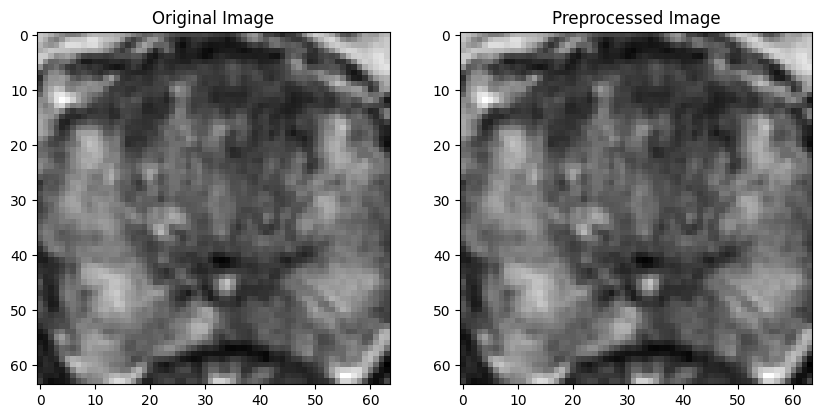

In [ ]:
# @title
img_path = os.path.join(test_folder_0, '10020_1000020_t2w10_t2w_class0.png')
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_preprocessed = array_creation_stacking_utils.preprocessing(img)
if img is not None:
    print("Image shape:", img.shape)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title('Original Image')
    axs[1].imshow(img_preprocessed, cmap='gray')
    axs[1].set_title('Preprocessed Image')
    plt.show()
else:
    print("Failed to load image.")

### Extracting and mapping tabular data turned into images


In [ ]:
# load tabular data from pickle file
file_path = os.path.join(BASE_DIR, 'claudio', 'black_box', 'data', 'tab_to_img', 'mapping_dict.pkl')
# Load and stack images for train, valid, and test sets
X_test, y_test = array_creation_stacking_utils.array_stacking(test_folder,file_path, subset='test')
# Count the occurrences of each label
label_counts_test = Counter(y_test)

print("Shape of X_test:", X_test.shape)

# Print the label distribution for the test set
print("\ntest set:")
for label, count in label_counts_test.items():
    print(f"Label {label}: {count} samples")

t2w (64, 64, 1)
adc (64, 64, 1)
hbv (64, 64, 1)
tab_array (64, 64, 1)
patient_id: 11006
t2w (64, 64, 1)
adc (64, 64, 1)
hbv (64, 64, 1)
tab_array (64, 64, 1)
patient_id: 11006
t2w (64, 64, 1)
adc (64, 64, 1)
hbv (64, 64, 1)
tab_array (64, 64, 1)
patient_id: 10178
t2w (64, 64, 1)
adc (64, 64, 1)
hbv (64, 64, 1)
tab_array (64, 64, 1)
patient_id: 10042
t2w (64, 64, 1)
adc (64, 64, 1)
hbv (64, 64, 1)
tab_array (64, 64, 1)
patient_id: 10448
t2w (64, 64, 1)
adc (64, 64, 1)
hbv (64, 64, 1)
tab_array (64, 64, 1)
patient_id: 11118
t2w (64, 64, 1)
adc (64, 64, 1)
hbv (64, 64, 1)
tab_array (64, 64, 1)
patient_id: 11108
t2w (64, 64, 1)
adc (64, 64, 1)
hbv (64, 64, 1)
tab_array (64, 64, 1)
patient_id: 10448
t2w (64, 64, 1)
adc (64, 64, 1)
hbv (64, 64, 1)
tab_array (64, 64, 1)
patient_id: 11214
t2w (64, 64, 1)
adc (64, 64, 1)
hbv (64, 64, 1)
tab_array (64, 64, 1)
patient_id: 10745
t2w (64, 64, 1)
adc (64, 64, 1)
hbv (64, 64, 1)
tab_array (64, 64, 1)
patient_id: 10419
t2w (64, 64, 1)
adc (64, 64, 1)


In [ ]:
# Load and stack images for train, valid, and test sets
X_valid, y_valid = array_creation_stacking_utils.array_stacking(valid_folder,file_path, subset='valid')

# Count the occurrences of each label
label_counts_valid = Counter(y_valid)

print("Shape of X_valid:", X_valid.shape)

# Print the label distribution for the validation set
print("\nValidation set:")
for label, count in label_counts_valid.items():
    print(f"Label {label}: {count} samples")

total lost files:0
Shape of X_valid: (700, 64, 64, 4)

Validation set:
Label 0: 497 samples
Label 1: 203 samples


In [ ]:
# Load and stack images for train, valid, and test sets
X_train, y_train = array_creation_stacking_utils.array_stacking(train_folder,file_path, subset='train')
X_valid, y_valid = array_creation_stacking_utils.array_stacking(valid_folder,file_path, subset='valid')
X_test, y_test = array_creation_stacking_utils.array_stacking(test_folder,file_path, subset='test')

# Count the occurrences of each label
label_counts_train = Counter(y_train)
label_counts_valid = Counter(y_valid)
label_counts_test = Counter(y_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of X_test:", X_test.shape)

# Print the label distribution for the train set
print("\nTrain set:")
for label, count in label_counts_train.items():
    print(f"Label {label}: {count} samples")

# Print the label distribution for the validation set
print("\nValidation set:")
for label, count in label_counts_valid.items():
    print(f"Label {label}: {count} samples")

# Print the label distribution for the test set
print("\nTest set:")
for label, count in label_counts_test.items():
    print(f"Label {label}: {count} samples")

10755 not found in mapping dict for subset: train
10755 not found in mapping dict for subset: train
10755 not found in mapping dict for subset: train
10181 not found in mapping dict for subset: train
10181 not found in mapping dict for subset: train
10951 not found in mapping dict for subset: train
10783 not found in mapping dict for subset: train
10966 not found in mapping dict for subset: train
10966 not found in mapping dict for subset: train
10966 not found in mapping dict for subset: train
10966 not found in mapping dict for subset: train
10966 not found in mapping dict for subset: train
11101 not found in mapping dict for subset: train
11101 not found in mapping dict for subset: train
11101 not found in mapping dict for subset: train
11101 not found in mapping dict for subset: train
11101 not found in mapping dict for subset: train
10011 not found in mapping dict for subset: train
10011 not found in mapping dict for subset: train
11282 not found in mapping dict for subset: train


## Save np.arrays externally

In [ ]:
# Define file paths for saving
save_path = os.path.join(BASE_DIR, 'claudio', 'black_box', 'data', 'np_array', 'val', 'tabular_final')
os.makedirs(save_path,exist_ok=True)

# Save the arrays to local files
train_data_file = os.path.join(save_path,'X_train.npy')
train_labels_file = os.path.join(save_path,'y_train.npy')

np.save(train_data_file, X_train)
np.save(train_labels_file, y_train)

valid_data_file = os.path.join(save_path,'X_valid.npy')
valid_labels_file = os.path.join(save_path,'y_valid.npy')

np.save(valid_data_file, X_valid)
np.save(valid_labels_file, y_valid)

test_data_file = os.path.join(save_path,'X_test.npy')
test_labels_file = os.path.join(save_path,'y_test.npy')

np.save(test_data_file, X_test)
np.save(test_labels_file, y_test)

print("Arrays saved successfully.")

Arrays saved successfully.
